In [47]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

2022-05-18 21:03:12.486386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-18 21:03:12.486461: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
t = np.arange(0, 100, 0.1)
y = np.sin(t)

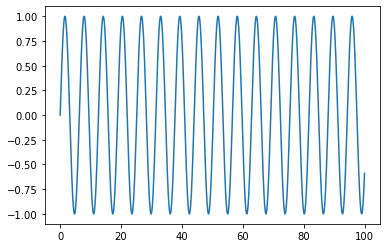

In [17]:
plt.plot(t, y)

In [18]:
t.shape

(1000,)

In [22]:
f1 = f2 = y / 2

In [34]:
data = np.stack((y, f1, f2), axis=1)
data.shape

In [39]:
df = pd.DataFrame(data, columns=["y", "f1", "f2"])
df.head()

In [42]:
# df.to_csv("/mnt/c/Users/JPhillips/ldz/data/fake/train.csv")

In [44]:
df = pd.read_csv("/mnt/c/Users/JPhillips/ldz/data/fake/train.csv")
df.head()

demand        f1        f2
0  0.000000  0.000000  0.000000
1  0.099833  0.049917  0.049917
2  0.198669  0.099335  0.099335
3  0.295520  0.147760  0.147760
4  0.389418  0.194709  0.194709

In [45]:
data = np.array(df, dtype=np.float32)
data.shape

(1000, 3)

In [73]:
dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=data,
    targets=None,
    sequence_length=1,
    sequence_stride=1,
    shuffle=True,
    batch_size=1,
)

In [74]:
features = next(iter(dataset))

In [75]:
input_slice = slice(0, 1, None)
labels_slice = slice(0, None, None)
input_width = 1
label_width = 1

In [76]:
inputs = features[:, input_slice, :]
labels = features[:, labels_slice, :]

inputs.shape, labels.shape

(TensorShape([1, 1, 3]), TensorShape([1, 1, 3]))

In [77]:
# if self.label_columns is not None:
labels = tf.stack([labels[:, :, 0]], axis=-1)
inputs = inputs[:, :, 1:]
inputs.shape, labels.shape

(TensorShape([1, 1, 2]), TensorShape([1, 1, 1]))

In [78]:
# Slicing does not preserve static shape information -> set the
# shapes manually to make `tf.data.Dataset`s easier to inspect.
inputs.set_shape([None, input_width, None])
labels.set_shape([None, label_width, None])
inputs.shape, labels.shape

(TensorShape([1, 1, 2]), TensorShape([1, 1, 1]))

In [79]:
inputs, labels

(<tf.Tensor: shape=(1, 1, 2), dtype=float32, numpy=array([[[-0.30170864, -0.30170864]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1, 1), dtype=float32, numpy=array([[[-0.6034173]]], dtype=float32)>)

In [80]:
in_sum = tf.reduce_sum(inputs, axis=-1)
lab_sum = tf.reduce_sum(labels, axis=-1)

in_sum.shape, lab_sum.shape

(TensorShape([1, 1]), TensorShape([1, 1]))

In [81]:
in_sum[0,:], lab_sum[0,:]

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.6034173], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.6034173], dtype=float32)>)